In [1]:
%matplotlib inline 

import numpy as np
import pylab as plt
import healpy as hp
from healpy import cartview

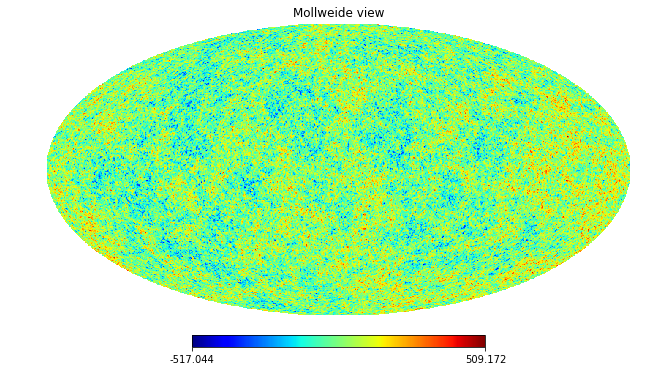

In [21]:
cmap = plt.cm.jet
cmap.set_under('w')
cmap.set_bad('gray',1.)

nside = 2048
lmax = 2500
fwhm = 0.0
fwhm = fwhm*np.pi/(180*60)

cl = np.loadtxt('../data/cl_planck_lensed')
ll = cl[:lmax,0]
cl = cl[:lmax,1]

m,alms = hp.sphtfunc.synfast(cl, nside=nside, lmax=lmax, mmax=None, alm=True, pol=False, pixwin=False, fwhm=fwhm, sigma=None, new=1, verbose=0)
cl_map = hp.sphtfunc.alm2cl(alms)

hp.mollview(m, nest=0, cmap=cmap)
hp.write_map('../data/maps/gaussian/1.fits', m, overwrite=1)

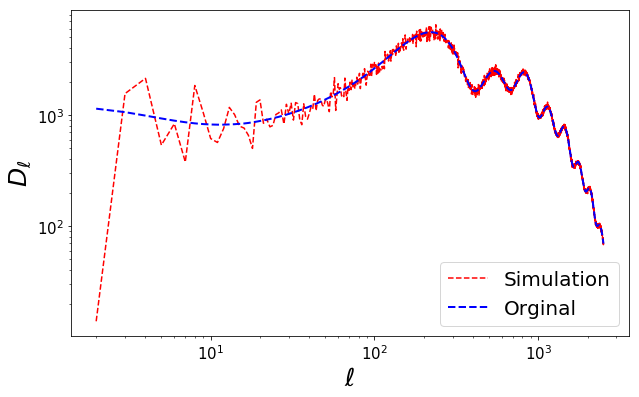

In [23]:
plt.figure(figsize=(10,6))

dl1 = []
dl2 = []
for i in range(ll.shape[0]):
    dl1.append(ll[i]*(ll[i]+1)*cl[i]/(2*np.pi))
    dl2.append(ll[i]*(ll[i]+1)*cl_map[i]/(2*np.pi))

plt.plot(ll,dl2,'r--',label='Simulation')
plt.plot(ll,dl1,'b--',lw=2,label='Orginal')
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=15)
plt.xlabel(r'$\ell$',fontsize=25)
plt.ylabel(r'$D_{\ell}$',fontsize=25)

plt.legend(loc='best',fontsize=20)